# CPSC 4970 AI + ML: Module 1


In [1]:
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import IPython
from IPython.core.display import display
import sklearn
import mglearn

## Loading data sets

- scikit-learn datasets:
  https://scikit-learn.org/stable/datasets.html#datasets
- Seaborn datasets:
  https://seaborn.pydata.org/generated/seaborn.load_dataset.html
- Pandas functions for reading from files/urls:
  https://pandas.pydata.org/docs/user_guide/io.html
- UCI machine learning data repository:
  https://archive.ics.uci.edu/ml/index.php
- Kaggle:
  https://kaggle.com


In [14]:
print(sklearn.datasets)
db = sklearn.datasets.load_diabetes(as_frame=True)['frame']
#print(db)
pen = sns.load_dataset('penguins')
#print(type(pen))
vac = pd.read_csv('data/vaccinations.csv')
print(vac.info())

<module 'sklearn.datasets' from '/Users/shaffer/Courses/CPSC4973ArtificialIntelligence/Code/Live/venv/lib/python3.9/site-packages/sklearn/datasets/__init__.py'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             32941 non-null  object 
 1   iso_code                             32941 non-null  object 
 2   date                                 32941 non-null  object 
 3   total_vaccinations                   19348 non-null  object 
 4   people_vaccinated                    18497 non-null  float64
 5   people_fully_vaccinated              15498 non-null  float64
 6   daily_vaccinations_raw               16340 non-null  float64
 7   daily_vaccinations                   32690 non-null  object 
 8   total_vaccinations_per_hundred       19347 non-null  float64
 9  

## Splitting training and testing data

scikit-learn docs:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [3]:
fake_data = np.array([1, 10, 2, 3, 15, 1, -1, -3, 18, 12, 22, 15]).reshape(4, 3)
display(fake_data)
train, test = sklearn.model_selection.train_test_split(db, test_size=0.33)
display(train)
display(test.head(5))

array([[ 1, 10,  2],
       [ 3, 15,  1],
       [-1, -3, 18],
       [12, 22, 15]])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
315,0.009016,-0.044642,-0.020218,-0.053871,0.031454,0.020607,0.056003,-0.039493,-0.010904,-0.001078,97.0
135,-0.005515,-0.044642,0.056307,-0.036656,-0.048351,-0.042963,-0.072854,0.037999,0.050782,0.056912,272.0
281,-0.092695,0.050680,-0.090275,-0.057314,-0.024960,-0.030437,-0.006584,-0.002592,0.024053,0.003064,94.0
401,0.016281,-0.044642,-0.045007,-0.057314,-0.034592,-0.053923,0.074412,-0.076395,-0.042572,0.040343,93.0
298,0.023546,0.050680,-0.037463,-0.046985,-0.091006,-0.075530,-0.032356,-0.039493,-0.030751,-0.013504,129.0
...,...,...,...,...,...,...,...,...,...,...,...
157,-0.001882,0.050680,-0.033151,-0.018294,0.031454,0.042840,-0.013948,0.019917,0.010226,0.027917,84.0
108,0.019913,0.050680,0.045529,0.029906,-0.062111,-0.055802,-0.072854,0.026929,0.045601,0.040343,232.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
12,0.016281,-0.044642,-0.028840,-0.009113,-0.004321,-0.009769,0.044958,-0.039493,-0.030751,-0.042499,179.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
321,0.096197,-0.044642,0.051996,0.079254,0.054845,0.036577,-0.076536,0.141322,0.098646,0.061054,230.0
14,0.045341,-0.044642,-0.025607,-0.012556,0.017694,-0.000061,0.081775,-0.039493,-0.031991,-0.075636,118.0
96,0.056239,0.050680,0.009961,0.049415,-0.004321,-0.012274,-0.043401,0.034309,0.060788,0.032059,150.0
93,-0.049105,-0.044642,-0.064408,-0.102071,-0.002945,-0.015406,0.063367,-0.047243,-0.033249,-0.054925,96.0
107,0.027178,-0.044642,0.049840,-0.055018,-0.002945,0.040648,-0.058127,0.052759,-0.052959,-0.005220,144.0


## Separate the feature matrix and target vector

- Pandas User Guide especially "10 minutes to pandas":
  https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

In [4]:
X_train = train[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
display(X_train)
X_test = test[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
# could use "iloc"
y_train = train['target']
y_test = test['target']
display(y_train)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
315,0.009016,-0.044642,-0.020218,-0.053871,0.031454,0.020607,0.056003,-0.039493,-0.010904,-0.001078
135,-0.005515,-0.044642,0.056307,-0.036656,-0.048351,-0.042963,-0.072854,0.037999,0.050782,0.056912
281,-0.092695,0.050680,-0.090275,-0.057314,-0.024960,-0.030437,-0.006584,-0.002592,0.024053,0.003064
401,0.016281,-0.044642,-0.045007,-0.057314,-0.034592,-0.053923,0.074412,-0.076395,-0.042572,0.040343
298,0.023546,0.050680,-0.037463,-0.046985,-0.091006,-0.075530,-0.032356,-0.039493,-0.030751,-0.013504
...,...,...,...,...,...,...,...,...,...,...
157,-0.001882,0.050680,-0.033151,-0.018294,0.031454,0.042840,-0.013948,0.019917,0.010226,0.027917
108,0.019913,0.050680,0.045529,0.029906,-0.062111,-0.055802,-0.072854,0.026929,0.045601,0.040343
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
12,0.016281,-0.044642,-0.028840,-0.009113,-0.004321,-0.009769,0.044958,-0.039493,-0.030751,-0.042499


315     97.0
135    272.0
281     94.0
401     93.0
298    129.0
       ...  
157     84.0
108    232.0
440    220.0
12     179.0
119    200.0
Name: target, Length: 296, dtype: float64

## Intro to data visualization

Tools:
- Use matplotlib directly:
 - https://matplotlib.org/stable/tutorials/introductory/pyplot.html (tutorial)
 - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot (reference)
- Use pandas visualization tools: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html -- not used in this course
- Use Seaborn:
 - https://seaborn.pydata.org/
 - https://seaborn.pydata.org/tutorial.html (tutorial)
 - https://seaborn.pydata.org/tutorial/function_overview.html (part of tutorial)
 - https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial (part of tutorial)
 - https://seaborn.pydata.org/tutorial/axis_grids.html (part of tutorial)

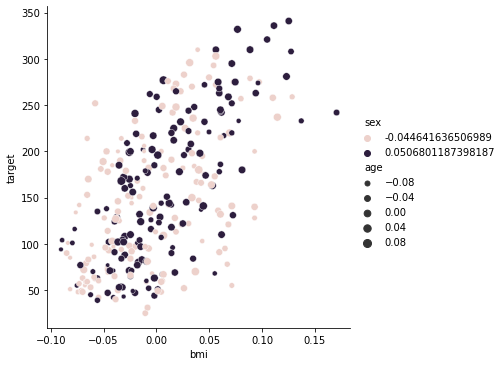

In [5]:
sns.relplot(x="bmi", y="target", hue='sex', size='age', data=train)

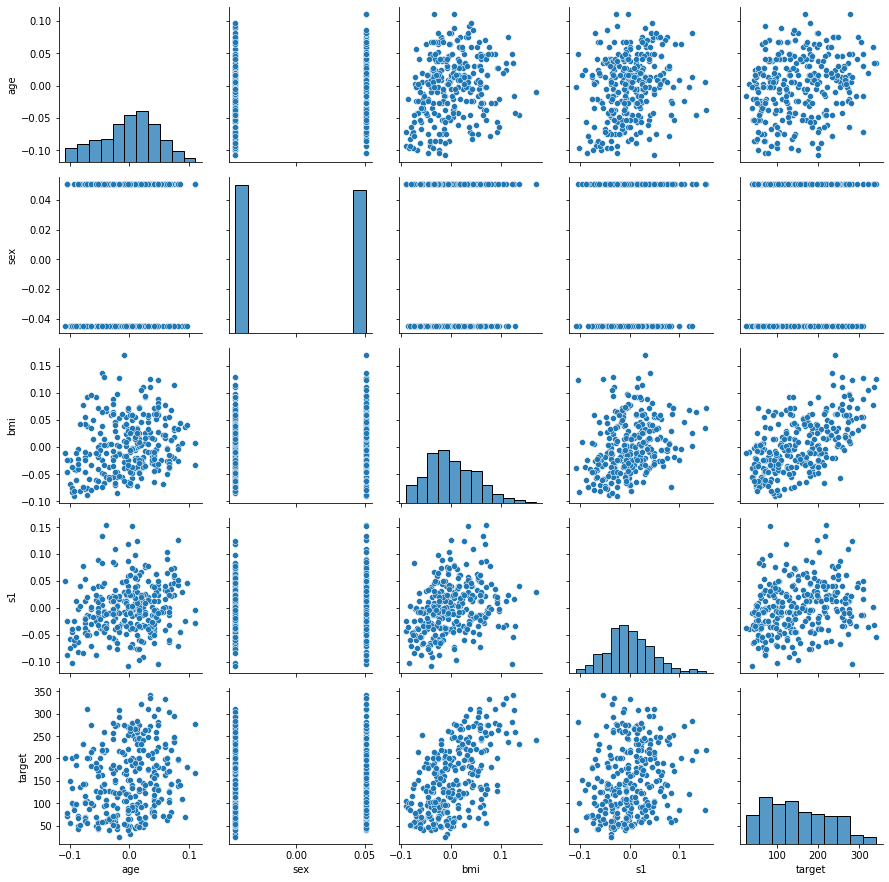

In [6]:
g = sns.PairGrid(train[['age', 'sex', 'bmi', 's1', 'target']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

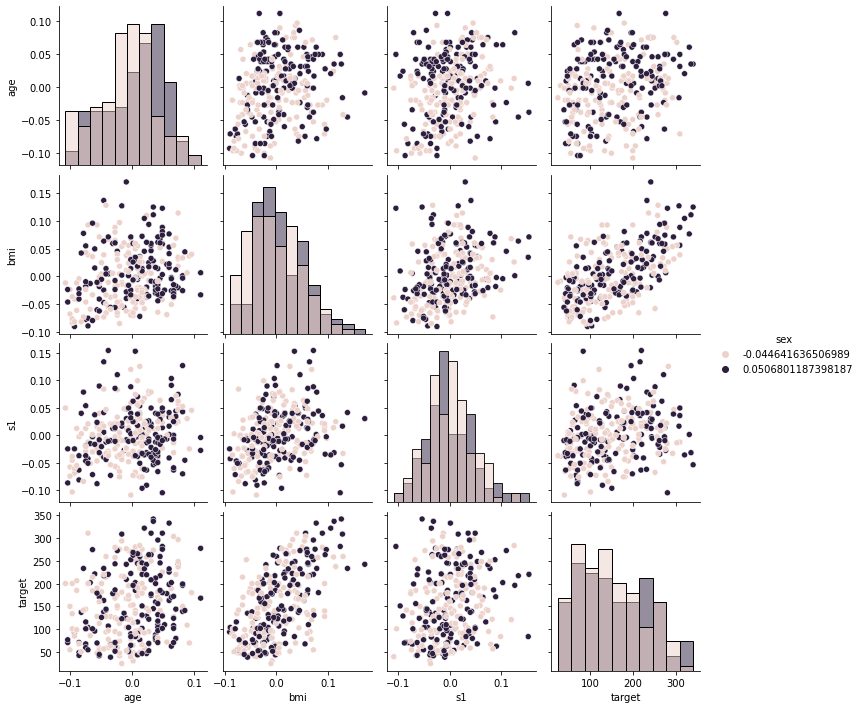

In [7]:
sns.pairplot(train[['age', 'sex', 'bmi', 's1', 'target']], hue='sex', diag_kind='hist')

## Univariate linear model

- Scikit-learn LinearRegression
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    and
    https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

Santity check:

In [8]:
synth = pd.read_csv('data/synthetic_linear_1var.csv')
X = synth[['x']]
y = synth['y']
synth_lr = sklearn.linear_model.LinearRegression().fit(X, y)
print("intercept: ", synth_lr.intercept_)
print("coeff: ", synth_lr.coef_)

intercept:  -0.11363636363637397
coeff:  [5.20272727]


Regression of BMI vs target

intercept:  149.8478469576477
coeff:  [933.82174522]


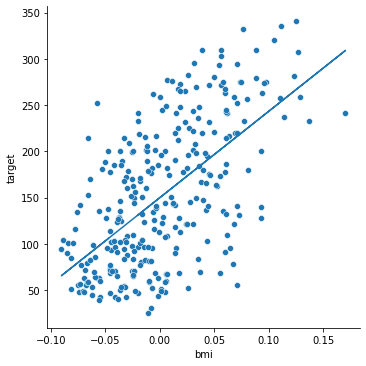

In [9]:
lr = sklearn.linear_model.LinearRegression().fit(X_train[['bmi']], y_train)
print("intercept: ", lr.intercept_)
print("coeff: ", lr.coef_)

sns.relplot(x='bmi', y='target', data=train)
p = lr.predict(X_train[['bmi']])
plt.plot(X_train[['bmi']], p)

## Metrics

- Scikit-learn's metrics module:
  https://scikit-learn.org/stable/modules/model_evaluation.html (especially "regression metrics" section)
  and
  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

First our synthetic data

In [10]:
p = synth_lr.predict(X)
mse = sklearn.metrics.mean_squared_error(synth['y'], p)
print("MSE: ", mse)
r2 = sklearn.metrics.r2_score(synth['y'], p)
print("R2: ", r2)

MSE:  2.510834710743799
R2:  0.990809352702975


Now for diabetes data set

In [11]:
p = lr.predict(X_train[['bmi']])
mse = sklearn.metrics.mean_squared_error(y_train, p)
print("MSE: ", mse)
r2 = sklearn.metrics.r2_score(y_train, p)
print("R2: ", r2)
print((max(y_train)-min(y_train))**2/len(y_train))

MSE:  3736.9292532658924
R2:  0.3676594370117968
337.35135135135135
